In [1]:
#add necessary libraries
import pandas as pd
import geopandas as gpd
import pysal as ps #library supporting spatial autocorrelations
import matplotlib.pyplot as plt #plotting

In [2]:
data = pd.read_csv('us-counties.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
data_grouped = data.groupby(['county','fips']).sum()
data_grouped.reset_index(level=0, inplace=True)
data_grouped.head()

,county,cases,deaths
fips,,,
45001.0,Abbeville,758,0
22001.0,Acadia,4396,254
51001.0,Accomack,5669,85
16001.0,Ada,23080,445
19001.0,Adair,63,0


In [5]:
spatial_data = gpd.read_file('tl_2019_us_county.shp')
spatial_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [6]:
data_grouped.index=data_grouped.index.astype(int)
spatial_data.GEOID = spatial_data.GEOID.astype(int)

In [7]:
#Joining spatial data with case data
sdat = pd.merge(spatial_data,data_grouped,how='left',left_on=spatial_data.GEOID,right_on=data_grouped.index)
sdat = sdat.drop(columns=['key_0'])
sdat = sdat[sdat['county'].notna()]
sdat.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,county,cases,deaths
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",Cuming,157.0,0.0
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",Wahkiakum,73.0,0.0
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",Lancaster,6254.0,35.0
6,46,099,01265772,46099,Minnehaha,Minnehaha County,06,H1,G4020,None,...,None,A,2089691755,18198481,+43.6674723,-096.7957261,"POLYGON ((-97.12928 43.58683, -97.12920 43.596...",Minnehaha,49746.0,279.0
9,21,053,00516873,21053,Clinton,Clinton County,06,H1,G4020,None,...,None,A,510875755,21152699,+36.7272577,-085.1360977,"POLYGON ((-85.23910 36.76983, -85.23443 36.786...",Clinton,80.0,0.0


In [8]:
sdat.shape

(2882, 21)

In [9]:
sdat["x"] = sdat.centroid.map(lambda p: p.x)
sdat["y"] = sdat.centroid.map(lambda p: p.y)
sdat = sdat[sdat['x'] > -130]
sdat.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,county,cases,deaths,x,y
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",Cuming,157.0,0.0,-96.787400,41.916403
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",Wahkiakum,73.0,0.0,-123.433470,46.291134
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",Lancaster,6254.0,35.0,-96.687756,40.784174
6,46,099,01265772,46099,Minnehaha,Minnehaha County,06,H1,G4020,None,...,2089691755,18198481,+43.6674723,-096.7957261,"POLYGON ((-97.12928 43.58683, -97.12920 43.596...",Minnehaha,49746.0,279.0,-96.791437,43.674178
9,21,053,00516873,21053,Clinton,Clinton County,06,H1,G4020,None,...,510875755,21152699,+36.7272577,-085.1360977,"POLYGON ((-85.23910 36.76983, -85.23443 36.786...",Clinton,80.0,0.0,-85.136014,36.727482


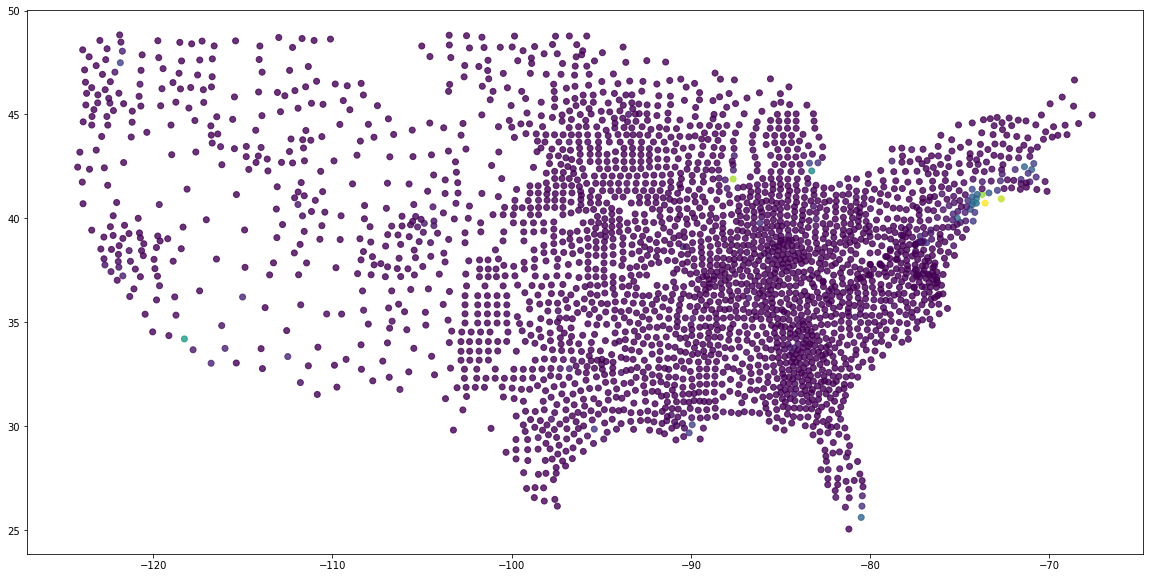

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(y= sdat.y, x = sdat.x , c = sdat.cases, alpha=0.8);
plt.show()

In [21]:
import libpysal as lps
import pysal

In [22]:
wdat = pysal.pdio.read_files("tl_2019_us_county.shp")
W = ps.queen_from_shapefile("tl_2019_us_county.shp")
W.transform = 'r'

AttributeError: module 'pysal' has no attribute 'pdio'

In [20]:
!pip install -U pysal

Requirement already up-to-date: pysal in /Users/akashyadav/Desktop/nyuclass/python3.8based/lib/python3.8/site-packages (2.2.0)


You should consider upgrading via the 'pip install --upgrade pip' command.
